# 实验一 基于KNN的手写数字识别
- 姓名：马永田
- 学号：2012911
- 专业：计算机科学与技术专业

### 实验要求
题目：基于KNN 的手写数字识别
实验条件：给定semeion手写数字数据集，给定kNN分类算法
实验要求：
1. 基本要求：编程实现kNN算法；给出在不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度（要求采用留一法）
2. 中级要求：与weka机器学习包中的kNN分类结果进行对比
3. 提高要求：将实验过程结果等图示展出

**截止日期：10月7日**
- 以.ipynb形式的文件提交，输出运行结果，并确保自己的代码能够正确运行
- 发送到邮箱：2120220594@mail.nankai.edu.cn

### 导入需要的包

In [1]:
import numpy as np
import operator
from collections import Counter
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt
import time


### 导入数据集 semesion

In [2]:
# 导入数据
def Img2Mat(fileName):
    f = open(fileName)
    ss = f.readlines()
    l = len(ss)
    f.close()
    returnMat = np.zeros((l,256))
    returnClassVector = np.zeros((l,1))
    for i in range(l):
        s1 = ss[i].split()
        for j in range(256):
            returnMat[i][j] = float(s1[j])
        clCount = 0
        for j in range(256,266):
            if s1[j] != '1':
                clCount += 1
            else:
                break
        returnClassVector[i] = clCount
    return returnMat,returnClassVector

In [3]:
X,y = Img2Mat('semeion.data')
np.shape(X), np.shape(y)
# X为数据集点阵
# y为识别tag

((1593, 256), (1593, 1))

### 基本要求
编程实现kNN算法；给出不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度（模板中采用的是普通方法分割训练集和测试集，作业中需要用留一法）

In [4]:
# KNN算法手动实现  留一法
def MyKnnClassifier(data_X, data_y, neighbors):
    acc = 0 # 累计准确个数
    data_len = np.shape(data_X)[0]
    for index in range(data_len):
        #训练集生成
        X_train = np.delete(data_X,index,axis=0)
        y_train = np.delete(data_y,index,axis=0)
        #测试集生成
        X_test = data_X[index]
        y_test = data_y[index]
        trainShape = np.shape(X_train)[0]   # 获得训练集的大小
        testRes = []  # 存放测试结果
        # 差异矩阵 = 该样本与训练集中所有样本之差构成的矩阵
        testDiffMat = np.tile(X_test,(trainShape , 1)) - X_train
        sqTestDiffMat = testDiffMat ** 2    # 将差异矩阵平方
        # 方差距离为方差矩阵的整行求和，是一个一位列向量
        sqTestDiffDis = sqTestDiffMat.sum(axis=1)
        testDiffDis = sqTestDiffDis ** 0.5  # 开方生成标准差距离
        sortIndex = np.argsort(testDiffDis)   # 将标准差距离按照下标排序
        labelCount = []
        for j in range(neighbors):  # 考察k近邻属于哪些类
            labelCount.append(y_train[sortIndex[j]][0])
        classifyRes = Counter(labelCount)    # 把k近邻中最多的那个标签作为分类结果
        classifyRes = classifyRes.most_common(2)[0][0]
        testRes.append(classifyRes)
        if classifyRes == y_test:  # 分类正确则将sum+1
            acc += 1
    accRate = acc / data_len
    print('k={0}时，测试个数为{1}  正确个数为：{2}  准确率为：{3}'.format(neighbors,data_len,acc,accRate))    
    return accRate

实验结果：

In [5]:
MyKnnClassifier(X, y, 1)
MyKnnClassifier(X, y, 3)
MyKnnClassifier(X, y, 5)

k=1时，测试个数为1593  正确个数为：1459  准确率为：0.9158819836785939
k=3时，测试个数为1593  正确个数为：1464  准确率为：0.9190207156308852
k=5时，测试个数为1593  正确个数为：1458  准确率为：0.9152542372881356


0.9152542372881356

### 中级要求
模板中与sklearn机器学习包中的kNN分类结果进行对比（作业中需要与weka机器学习包中的kNN分类结果进行对比）

#### 使用Weka机器学习包中的kNN分类器
实验中发现csv和data格式的文件均无法成功导入到weka软件中.

故先将数据进行简单处理并导出为csv格式文件后,利用现成工具将其转换为arff文件.

In [6]:
import pandas as pd
from xml.etree.ElementTree import tostring
t_attr=[]
for i in range(np.shape(X)[1]):
    t_attr.append("V"+str(i))
t_attr.append('Class') #添加列名(属性名)

attr = np.array(t_attr)
temp1 = np.hstack((X,y)) #数据集点阵和识别tag拼接
temp2 = np.vstack((attr,temp1)) #列名拼接
df = pd.DataFrame(temp2)
#print(df)
df.to_csv('semeion.csv',index=False,header=False) #输出为csv文件

K取1~29 最终得到如下数据:

In [7]:
scores_weka = [ 0.914626,0.885750,0.903327,0.901444,0.902699,0.902699,0.903327,
                0.897050,0.899561,0.899561,0.905838,0.899561,0.895794,0.892655,
                0.893283,0.893283,0.893911,0.895166,0.893911,0.895166,0.889517,
                0.887633,0.886378,0.885750,0.883867,0.885122,0.885750,0.885122,
                0.885122]

### 高级要求
将实验过程结果等图示展出

In [8]:
scores1 = []
scores_weka = [ 0.914626,0.885750,0.903327,0.901444,0.902699,0.902699,0.903327,
                0.897050,0.899561,0.899561,0.905838,0.899561,0.895794,0.892655,
                0.893283,0.893283,0.893911,0.895166,0.893911,0.895166,0.889517,
                0.887633,0.886378,0.885750,0.883867,0.885122,0.885750,0.885122,
                0.885122]
for k in range(1,30):
    score1 = MyKnnClassifier(X, y, k)
    scores1.append(score1)

k=1时，测试个数为1593  正确个数为：1459  准确率为：0.9158819836785939
k=2时，测试个数为1593  正确个数为：1459  准确率为：0.9158819836785939
k=3时，测试个数为1593  正确个数为：1464  准确率为：0.9190207156308852
k=4时，测试个数为1593  正确个数为：1465  准确率为：0.9196484620213434
k=5时，测试个数为1593  正确个数为：1458  准确率为：0.9152542372881356
k=6时，测试个数为1593  正确个数为：1464  准确率为：0.9190207156308852
k=7时，测试个数为1593  正确个数为：1469  准确率为：0.9221594475831764
k=8时，测试个数为1593  正确个数为：1472  准确率为：0.9240426867545511
k=9时，测试个数为1593  正确个数为：1471  准确率为：0.9234149403640929
k=10时，测试个数为1593  正确个数为：1465  准确率为：0.9196484620213434
k=11时，测试个数为1593  正确个数为：1456  准确率为：0.9139987445072191
k=12时，测试个数为1593  正确个数为：1460  准确率为：0.9165097300690521
k=13时，测试个数为1593  正确个数为：1461  准确率为：0.9171374764595104
k=14时，测试个数为1593  正确个数为：1453  准确率为：0.9121155053358443
k=15时，测试个数为1593  正确个数为：1446  准确率为：0.9077212806026366
k=16时，测试个数为1593  正确个数为：1446  准确率为：0.9077212806026366
k=17时，测试个数为1593  正确个数为：1442  准确率为：0.9052102950408035
k=18时，测试个数为1593  正确个数为：1438  准确率为：0.9026993094789705
k=19时，测试个数为1593  正确个数为：1436  准确率为：0.901443816698054
k=2

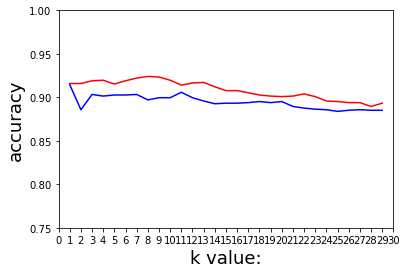

In [ ]:
plt.xlabel('k value:',fontsize=18)
plt.ylabel('accuracy',fontsize=18)
x_major_locator = plt.MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0, 30)
plt.ylim(0.75, 1)
# 普通kNN分类精度
plt.plot(range(1,30),scores1,'r')
plt.plot(range(1,30),scores_weka,'b')
plt.show()

观察最终图表可以发现使用留一法验证的给定kNN算法识别精度均高于Weka机器学习包中的kNN算法；并且随着K值的增大，两种方法的精度均降低。

查询资料后得知是由于k越大，表示模型的学习能力越弱，因为k越大，它越倾向于从“面”上考虑做出判断，而不是具体地考虑一个样本近身的情况来做出判断，所以偏差会越来越大。
考虑一个最极端的情况也可得出该结论，例如 K=N（N为训练样本个数）时，此时无论输入实例是什么，都只是简单的预测它属于在训练实例中最多的类，模型过于简单，忽略了训练实例中大量有用信息。
相应的，K值的减小就意味着整体模型变得复杂，容易发生过拟合。